In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

file = 'Housing_Price_data_set.csv'
dataFrame = pd.read_csv(file)
#array2d = nm.array(dataFrame)
newDataFrame = DataFrame(dataFrame, columns = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl'])
dataArr = np.array(newDataFrame)

x = np.insert(dataArr, 0, 1, axis = 1)
target = DataFrame(dataFrame, columns = ['price'])
y = np.array(target)
[r, c] = x.shape
theta = np.ones((c, 1))
alpha = 0.001
temp = np.zeros((c, 1))

def cost_compute(features, values, theta):
    m = len(values)
    sum_of_sq = np.square(np.dot(features, theta) - values).sum()
    #sum_of_sq = np.dot((np.dot(features, theta) - values), (np.dot(features, theta) - values)).sum()    
    cost = sum_of_sq / (2 * m)
    #print(cost)
    return cost

def gradient_descent(features, values, theta, alpha, num_itr):
    m = len(values)
    cost_history = []
    for i in range(num_itr):
        predicted_values = np.dot(features, theta)
        #predicted_values.shape
        theta = theta - (alpha / m) * np.dot(np.transpose(features), predicted_values - y)
        cost = cost_compute(features, values, theta)
        cost_history.append(cost)
    return theta, pd.Series(cost_history)

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in square


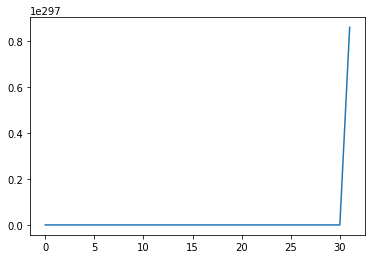

In [5]:
[th, c] = gradient_descent(x, y, theta, alpha, 200)
plt.plot(c)